# Music machine learning - Introduction

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. A [first definition](#definition) on the concept of machine learning
2. An introduction to a simple problem of [linear regression](#regression)
3. An explanation on [model capacity and overfitting](#capacity)
4. An introduction to the [audio datasets](#audio) that we will use

<a id="definition"></a>
## Defining machine learning

In all natural process, there exists complex relations between sets $\mathcal{X} \mapsto \mathcal{Y}$. This can relate some objects with their names, or a cause to a consequence. In most cases, _we do not know the precise relations_ between these sets, all we have is _observations_ such as pairs $(x,y)$, composed of input data $x \in \mathcal{X}$, which have a corresponding expected output $y \in \mathcal{Y}$. The overarching goal of machine learning is to approximate such _unknown processes_ as a function $\mathcal{F}_{\theta}$, which _transforms_ input data $x$ into output data $y$.

<img src="images/01_machine_learning_basic.png" align="center"/>

Hence, machine learning aims to understand and model the relationship between some (usually complex and high-dimensional) inputs $\mathbf{x}\in\mathcal{X}\subset\mathbb{R}^{\mathcal{X}}$ and outputs $\mathbf{y}\in\mathcal{Y}\subset\mathbb{R}^{\mathcal{Y}}$, given by a set of data examples $\mathcal{D}=\left\{(x_1,y_1),\cdots,(x_N,y_N)\right\}$. This is achieved by defining a parametric model $f_{\mathbf{\theta}}\in\mathcal{F}$ inside a family of functions $\mathcal{F}$, which depends on parameters $\mathbf{\theta} \in \mathbf{\Theta}$ and that could approximate the underlying relationship. The _learning_ aspect refers to the adjustment of the parameters $\mathbf{\theta}$ in order to obtain the best approximation of the given task
$$
\begin{equation}
f_{\mathbf{\theta}}(\mathbf{x}) = \hat{\mathbf{y}}\approx \mathbf{y}.
\end{equation}
$$

To observe this idea in simple setups, we are going to use the `numpy` library and `matplotlib` for plotting. We also set some fixed random generator, to ensure reproducibility

In [1]:
# Base imports
import numpy as np
import matplotlib.pyplot as plt
from helper_plot import prep_plots, finalize_plots, hdr_plot_style
rng = np.random.RandomState(1)

<a id="regression"></a>
## Simple learning problem

Imagine that a certain process somewhere follows the form of a quadratic relationship

$$
 y = a x^{2} + bx + c 
$$

In this case, all the **unknown parameters** are that of a polynomial model, therefore we have $\theta = \{a, b, c\}$. However, this is clearly an ideal (clean) case, whereas in natural observations, there might be some noise in our observations
$$
 y = a x^{2} + bx + c +\epsilon \quad \mbox{with} \quad \epsilon \in [-0.1, 0.1]
$$

An example of such noisy observations for different parameters is given below

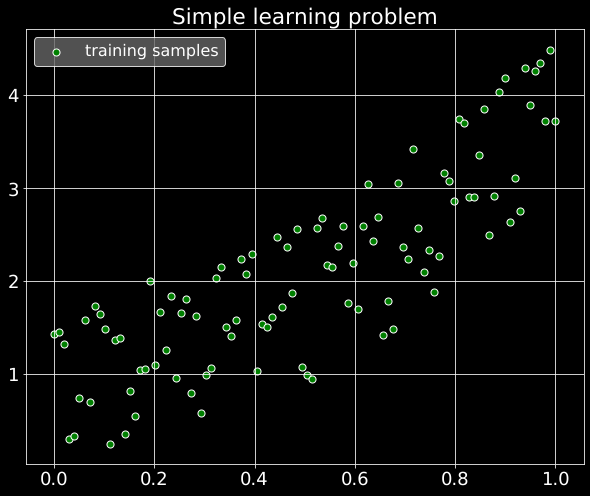

In [2]:
noise_level = 0.9
a, b, c = 3, 0, 1
# Generating 
x = np.linspace(0, 1, 100)
poly = np.poly1d([a, b, c])
epsilon = np.random.uniform(-noise_level,noise_level,x.shape)
y = poly(x) + epsilon
ax1, = prep_plots(["Simple learning problem"], fig_size=(10,8), fig_num=1)
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")
#plt.xlim([-1, 2])

Now our main problem is that this function can follow different types of parameters

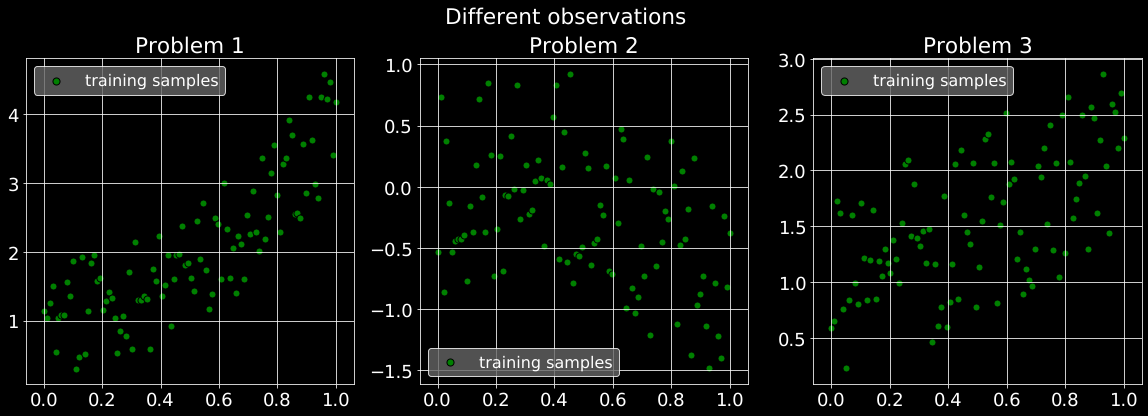

In [3]:
params = [[3, 0, 1], [-2, 1, 0], [0.1, 1, 1]]
ax = prep_plots(["Problem 1", "Problem 2", "Problem 3"], fig_size=(20,6), fig_num=1)
# Generating 
x = np.linspace(0, 1, 100)
for p in range(len(params)):
    poly = np.poly1d(params[p])
    epsilon = np.random.uniform(-noise_level,noise_level,x.shape)
    y = poly(x) + epsilon
    ax[p].scatter(x, y, color='green', s=50, marker='o', edgecolor='k', label="training samples")
finalize_plots(ax, fig_title="Different observations")

In real-life settings, this function can also have different levels of noise, as exemplified in the following code.

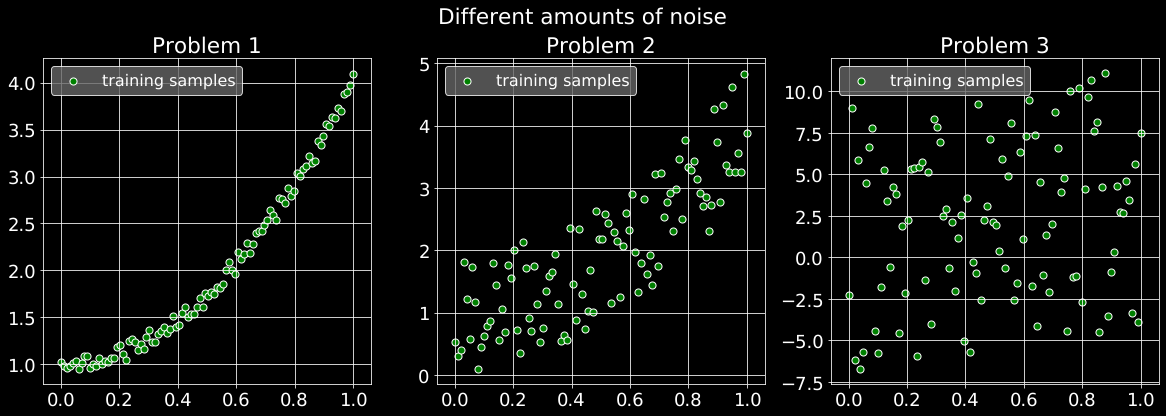

In [4]:
params = [3, 0, 1]
noise_levels = [0.1, 1.0, 8.0]
ax = prep_plots(["Problem 1", "Problem 2", "Problem 3"], fig_size=(20,6), fig_num=1)
# Generating 
x = np.linspace(0, 1, 100)
for p in range(len(noise_levels)):
    poly = np.poly1d(params)
    epsilon = np.random.uniform(-noise_levels[p],noise_levels[p],x.shape)
    y = poly(x) + epsilon
    ax[p].scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots(ax, fig_title="Different amounts of noise")

To summarize, we will have some observations of a function, and we would like to optimize a function that gets as close as possible to the real function that generated this data. Here, we plot the real function and also _subsample_ our number of observations (having only a few points to find the corresponding function)

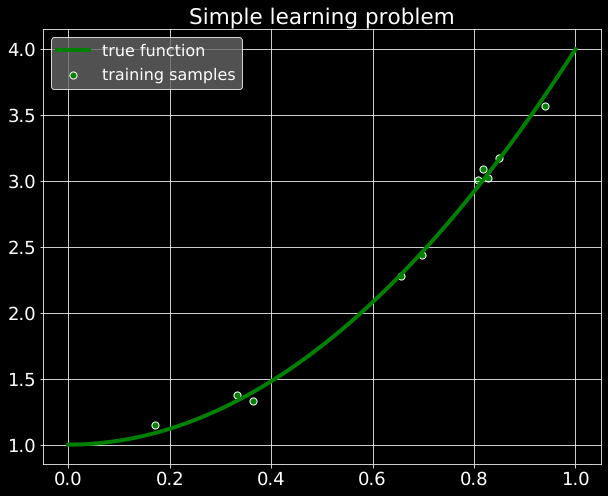

In [5]:
# Generating the data and subsampling
x_all = np.linspace(0, 1, 100); x_plot = np.linspace(0, 1, 100)
rng.shuffle(x_all); x = np.sort(x_all[:10])
poly = np.poly1d([3,0,1])
# Adding some external
epsilon = np.random.uniform(-0.1,0.1,x.shape)
y = poly(x)+ epsilon
# We keep the standard deviation for later
nnstd = np.std(epsilon); lw = 2
ax1, = prep_plots(["Simple learning problem"], fig_size=(10,8), fig_num=1)
ax1.plot(x_plot, poly(x_plot), color='green', linewidth=4, label='true function')
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")

To get a first grip on what machine learning does, we will rely on the `scikit-learn` library. This contains already coded models and learning procedure, that will allow us to _learn_ the parameters of this unknown function.

Here we already know that we want to use a `PolynomialFeatures` model to perfom `LinearRegression` and that this polynomial should be of degree 2.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Our data to fit
X = x[:, np.newaxis]
# Degree of our polynomial
degree = 2;
# Create our polynomial model for regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit the parameters of this model
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Now that we have trained the model, we can perform _predictions_ from it, meaning that we can infer the output of the function at values that we did not observe originally.

Model error : 0.049909670727830834


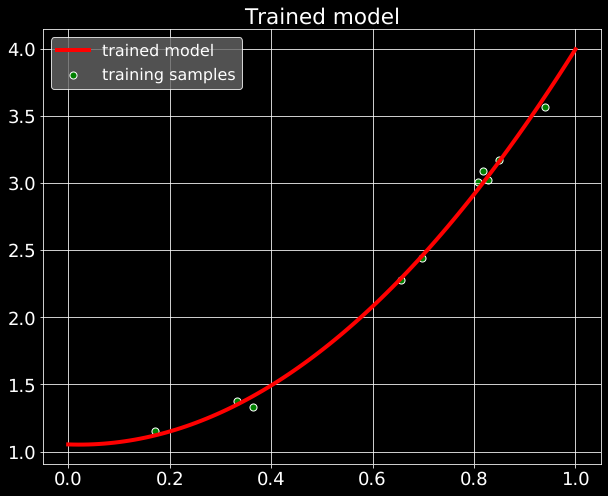

In [7]:
# Inference points (not observed)
X_plot = x_plot[:, np.newaxis]
# Predict the values
y_plot = model.predict(X_plot)
# Compute the error of our model at observed points
Y_model_err = np.sqrt(np.mean(np.square(y-model.predict(X))))
# Plot the result
ax1, = prep_plots(["Trained model"], fig_size=(10,8), fig_num=1)
ax1.plot(x_plot, y_plot, color='red', linewidth=4, label='trained model')
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")
print(f'Model error : {Y_model_err}')

<a id="capacity"></a>
## Understanding model capacity and selection


In real-life problem, we are aiming to find the parameters of a model, but we do not really know what is the _real_ function underlying this process. So what we can decide to select _any_ function of _any_ **capacity** (complexity of the function). One of the problem with that, is that if we have a too simple function, it will _underfit_ (it is not complex enough for our observations). On the opposite end, if we have a function which is too complex, it might be able to _fit through all training points exactly_ ... even though there is noise in our observations ! This is examplified in the following

<img src="images/01_soa_function_families.png" align="center"/>

We can observe this idea and play with it directly by trying to find a function approximating our previous observations with a polynomial function chosen to have a degree inside \([1,2,8]\).


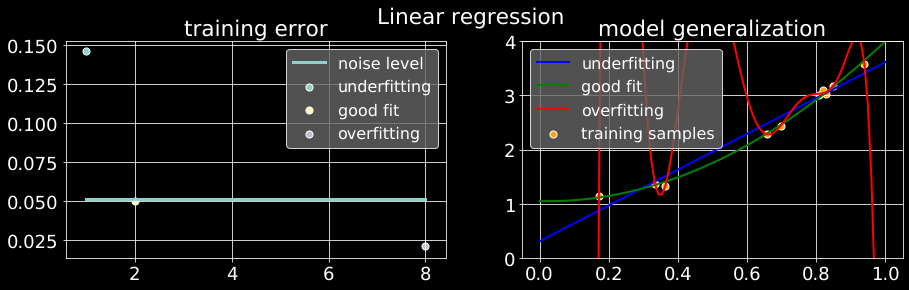

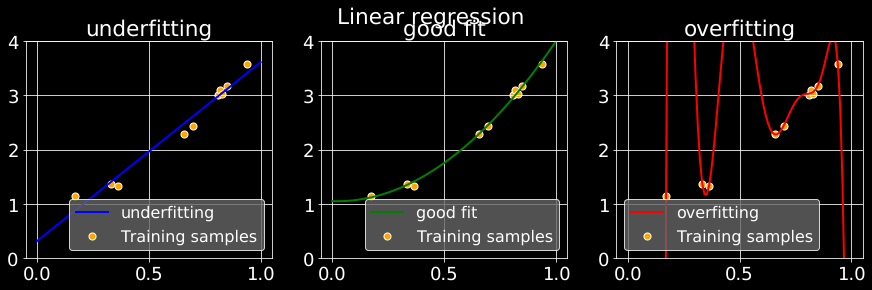

In [8]:
X_plot = x_plot[:, np.newaxis]
ax1, ax2 = prep_plots(["training error", "model generalization"], fig_size=(15,4), fig_num=1)
ax1.plot([1,8], [nnstd, nnstd], label="noise level")
ax2.scatter(x, y, color='orange', edgecolor='w', s=50, marker='o', label="training samples")
colors = ['blue', 'green', 'red']; labels = ['underfitting', 'good fit', 'overfitting']
axes_sub = prep_plots(labels, fig_size=(15,4), fig_num=2)
# Optimize different degree polynomials
for count, degree in enumerate([1,2,8]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    Y_model_err = np.sqrt(np.mean(np.square(y-model.predict(X))))
    y_plot = model.predict(X_plot)
    ax1.scatter(degree, Y_model_err, s=50, marker="o", edgecolor='w', label=labels[count])
    ax2.plot(x_plot, y_plot, color=colors[count], linewidth=2,label=labels[count])
    ax2.set_ylim((0,4))
    axes_sub[count].scatter(x, y, color='orange', edgecolor='w', s=50, marker='o', label="Training samples")
    axes_sub[count].plot(x_plot, y_plot, color=colors[count], linewidth=2,label=labels[count])
    axes_sub[count].set_ylim((0,4))
finalize_plots(axes_sub, fig_title="Linear regression")
finalize_plots([ax1,ax2], fig_title="Linear regression")


Depending on the _capacity_ of the model, what we can observe is that

- `capacity too low   -> underfitting   : prediction variance >  noise variance`
- `adequate capacity  -> good fit       : prediction variance == noise variance`
- `capacity too high  -> overfitting    : prediction variance <  noise variance`


A similar example can be given for a classification problem in two dimensions as follows

<img src="images/01_underfit.png" align="center"/>


<a id="audio"></a>
## Audio applications

In order to test our algorithms on audio and music data, we will work with several datasets that should be downloaded on your local computer first from this [link ![](images/file.png)](https://nuage.ircam.fr/index.php/s/FTsaaAMFV1jEwsk)

  |**Type**|*Origin*|
  |-------:|:---------|
  |**Classification**|[*MuscleFish*](http://knight.cis.temple.edu/~vasilis/Courses/CIS750/Papers/muscle_fish.pdf) dataset|
  |**Music-speech**|[*MIREX Recognition*](http://www.music-ir.org/mirex/wiki/2015:Music/Speech_Classification_and_Detection) set|
  |**Source separation**|[*SMC Mirum*](http://smc.inesctec.pt/research/data-2/) dataset|
  |**Speech recognition**|[*CMU Arctic*](http://festvox.org/cmu_arctic/) dataset|

**Unzip the file and place the `data` folder along with the other code folders**
For the first parts of the tutorial, we will mostly rely solely on the classification dataset. In order to facilitate the interactions, we provide the function `import_dataset` that will allow to import all audio datasets along the tutorials.

```Python
def importDataset(class_path, type):
    """
    Helper function to import datasets
    % class_path  : Path to the dataset (string)
    % type       : Type of dataset (string: 'classify', 'plain', 'metadata')
    """ 
    # Returns the data_struct structure with
    data_struct["filenames"]  # Cell containing the list of audio files
    data_struct["classes"]    # Vector of indexes assigning each file to a class
    data_struct["class_names"] % Cell of class names
    return data_struct
```
  
***

**_Exercise_**  

  1. Launch the import procedure  and check the corresponding structure
  2. Code a count function that prints the name and number of examples for each classes 

***

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from helper_data import import_dataset
# 0.1 - Import the classification dataset
class_path = 'data/classification';
data_struct = import_dataset(class_path, 'classification');

    - Importing dataset data/classification.



In [10]:
#%% Q-0.1.2 - Count function to print the number of examples

######################
print(data_struct.keys())
k=0
for name in data_struct["class_names"]:
    counter=0
    for classn in data_struct["classes"]:
        if classn==k:
            counter+=1
    print(name+ " : "+ str(counter))
    k+=1
######################


dict_keys(['filenames', 'classes', 'class_names'])
altotrombone : 13
telephone : 17
percussion : 99
animals : 9
violinpizz : 40
speech.female : 35
violinbowed : 45
oboe : 32
bells : 7
speech.male : 17
laughter : 7
tubularbells : 20
crowds : 4
cellobowed : 47
water : 7
machines : 11


### Preprocessing

We will rely on a set of spectral transforms that allow to obtain a more descriptive view over the audio information. As most of these are out of the scope of the machine learning course, we redirect you to a [signal processing course](https://ccrma.stanford.edu/~jos/sasp/) proposed by [Julius O. Smith](https://ccrma.stanford.edu/~jos/).  

The following functions to compute various types of transforms are given as part of the basic package, in the `helper_data.py` file  

  |**File**|*Transform*|
  |-------:|:----------|
  |`stft.m`       |[Short-term Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)|
  |`fft2barkmx.m` |[Bark scale](https://en.wikipedia.org/wiki/Bark_scale) transform|
  |`fft2melmx.m`  |[Mel scale](https://en.wikipedia.org/wiki/Mel_scale) transform|
  |`fft2chromamx` |[Chromas vector](https://en.wikipedia.org/wiki/Harmonic_pitch_class_profiles)|
  |`spec2cep.m`   |[Cepstrum](https://en.wikipedia.org/wiki/Cepstrum) transform|
  |`cqt.m`        |[Constant-Q](https://en.wikipedia.org/wiki/Constant_Q_transform) transform|

In order to perform the various computations, we provide the following function, which performs the different transforms on a complete dataset.  

``` Python
def computeTransforms(data_struct)
    """ data_struct   : Dataset structure with filenames """
    return data_struct

# Returns the data_struct structure with
data_struct["spectrum_power"]     # Power spectrum (STFT)
data_struct["spectrum_mel"]       # Spectrum in Mel scale
data_struct["spectrum_chroma"]    # Chroma vectors
data_struct["spectrum_CQT"]       # Constant-Q transform
```


***

**Exercise**  

  1. Launch the transform computation procedure and check the corresponding structure
  2. For each class, select a random element and plot its various transforms on a single plot. You should obtain plots similar to those shown afterwards.
  3. For each transform, try to spot major pros and cons of their representation.
  
***

In [11]:
# 0.2 - Pre-process the audio to obtain spectral transforms 
# (may take around a minute)
from helper_data import compute_transforms
data_struct = compute_transforms(data_struct);

    - Performing transforms.
27934
1024
18642
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=437
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=219
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=292
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=146
  warnings.warn(


13390
1024
18766
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=419
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=210
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=105
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=294
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=147
  warnings.warn(


28309
1024
22319
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=443
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=222
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=349
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=175
  warnings.warn(


12424
1024
23870
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=389
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=195
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=98
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=373
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=187
  warnings.warn(


23506
1024
31579
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=368
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=184
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=494
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=247
  warnings.warn(


18666
1024
13006
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=407
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=204
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=102
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=348
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=174
  warnings.warn(


22242
1024
4249
1024
4907
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=266
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=133
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=67
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=34
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=307
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=154
  warnings.warn(
/home/thomas

4125
1024
3479
1024
5360
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=435
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=218
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=109
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=55
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=28
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=335
  warnings.warn(
/home/thomas

4474
1024
4169
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=35
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=261
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=131
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=66
  warnings.warn(


59555
1024
5054
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=466
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=316
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=158
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=79
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=40
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=320
  warnings.warn(
/home/thomas

5119
1024
4579
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=287
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=144
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=72
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=36
  warnings.warn(


67580
1024
4397
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=275
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=138
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=69
  warnings.warn(


62283
1024
4501
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=487
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=282
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=141
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=71
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=279
  warnings.warn(


4450
1024
4189
1024
6876
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=262
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=430
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=215
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=108
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=54
  warnings.warn(


23102
1024
7163
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=361
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=181
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=448
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=224
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=112
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=56
  warnings.warn(


33104
1024
8235
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=259
  warnings.warn(


11130
1024
23648
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=87
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=370
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=185
  warnings.warn(


20645
1024
9952
1024
4704
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=323
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=162
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=311
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=156
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=78
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=74
  warnings.warn(
/home/thomas

15168
1024
13619
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=474
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=237
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=119
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=426
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=213
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=107
  warnings.warn(


10711
1024
4778
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=299
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=150
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=75
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=38
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=314
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=157
  warnings.warn(


20074
1024
45127
1024
5062
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=353
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=317
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=159
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=264
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=132
  warnings.warn(


8429
1024
8665
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=271
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=136
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=68
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=341
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=171
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=86
  warnings.warn(
/home/thomas

5454
1024
6808
1024
21891
1024
8493
1024
5024
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=343
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=172
  warnings.warn(


10243
1024
33889
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=321
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=161
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=81
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=265
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=439
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=220
  warnings.warn(
/home/thoma

3509
1024
87418
1024
7769
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=486
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=243
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=122
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=61
  warnings.warn(


8924
1024
10422
1024
7072
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=326
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=163
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=82
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=442
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=221
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=111
  warnings.warn(
/home/thoma

8695
1024
8778
1024
9245
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=289
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=145
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=73
  warnings.warn(


19848
1024
22290
1024
20142
1024
23458
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=315
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=367
  warnings.warn(


12934
1024
20036
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=405
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=203
  warnings.warn(


9773
1024
34346
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=306
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=153
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=269
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=91
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=46
  warnings.warn(


9322
1024
5769
1024
5914
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=93
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=47
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=328
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=164
  warnings.warn(


10478
1024
20841
1024
9206
1024
6990
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=288
  warnings.warn(


38038
1024
8931
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=298
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=352
  warnings.warn(


11243
1024
6050
1024
7391
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=176
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=88
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=379
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=190
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=95
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=48
  warnings.warn(
/home/thomasa

9986
1024
10124
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=313
  warnings.warn(


17033
1024
17470
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=267
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=134
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=273
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=137
  warnings.warn(


10139
1024
10696
1024
15192
1024
5578
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=475
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=238
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=44
  warnings.warn(


31226
1024
7160
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=488
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=244
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=296
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=148
  warnings.warn(


9463
1024
19786
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=310
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=155
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=503
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=252
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=126
  warnings.warn(


16082
1024
25496
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=399
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=200
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=458
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=229
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=115
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=441
  warnings.warn(


7316
1024
7048
1024
9795
1024
9529
1024
22826
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=149
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=357
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=179
  warnings.warn(


7591
1024
18728
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=60
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=293
  warnings.warn(


24275
1024
19651
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=380
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=308
  warnings.warn(


50587
1024
10327
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=396
  warnings.warn(


17861
1024
6571
1024
5722
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=411
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=206
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=103
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=52
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=358
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=90
  warnings.warn(
/home/thomas

44406
1024
7153
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=347
  warnings.warn(


12150
1024
19282
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=302
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=151
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=428
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=214
  warnings.warn(


4227
1024
6836
1024
17601
1024
7379
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=276
  warnings.warn(


13382
1024
8947
1024
14117
1024
4479
1024
4896
1024
33807
1024
4087
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=511
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=256
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=128
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=64
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=32
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=382
  warnings.warn(
/home/thomas

12216
1024
79644
1024
41803
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=327
  warnings.warn(


60161
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=471
  warnings.warn(


76637
1024
79072
1024
15644
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=489
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=245
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=123
  warnings.warn(


51250
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=401
  warnings.warn(


82116
1024
35771
1024
6957
1024
5816
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=364
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=182
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=369
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=41
  warnings.warn(


5895
1024
5233
1024
3654
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=457
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=29
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=355
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=178
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=89
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=433
  warnings.warn(
/home/thomas

5670
1024
6921
1024
3341
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=418
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=209
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=53
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=27
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=334
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=167
  warnings.warn(
/home/thomas

5338
1024
6180
1024
6966
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=49
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=436
  warnings.warn(


4584
1024
6544
1024
3415
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=409
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=205
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=427
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=509
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=255
  warnings.warn(


8129
1024
4552
1024
3650
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=285
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=143
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=198
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=99
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=50
  warnings.warn(


6330
1024
5247
1024
3702
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=463
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=232
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=402
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=201
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=101
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=51
  warnings.warn(


6417
1024
13541
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=424
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=212
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=106
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=350
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=423
  warnings.warn(


5594
1024
3381
1024
6128
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=383
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=192
  warnings.warn(


5062
1024
5724
1024
5055
1024
5321
1024
6060
1024
7070
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=333
  warnings.warn(


6869
1024
3234
1024
5417
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=26
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=339
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=170
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=85
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=490
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=62
  warnings.warn(
/home/thomasa

3917
1024
5801
1024
5935
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=363
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=371
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=186
  warnings.warn(


3478
1024
3597
1024
4033
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=450
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=225
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=113
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=57
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=505
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=253
  warnings.warn(
/home/thoma

2977
1024
6753
1024
11074
1024
5665
1024
5538
1024
6850
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=429
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=319
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=473
  warnings.warn(


5089
1024
7553
1024
6465
1024
8961
1024
4226
1024
3969
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=281
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=497
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=249
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=125
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=63
  warnings.warn(


3265
1024
6465
1024
9281
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=291
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=30
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=501
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=251
  warnings.warn(


3777
1024
8001
1024
3841
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=481
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=241
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=121
  warnings.warn(


6209
1024
8545
1024
3905
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=268
  warnings.warn(


5921
1024
4226
1024
4033
1024
6689
1024
3169
1024
7969
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=397
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=199
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=100
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=25
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=499
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=250
  warnings.warn(


6401
1024
7393
1024
4001
1024
10817
1024
6434
1024
4321
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=403
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=202
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=461
  warnings.warn(


3681
1024
4161
1024
32180
1024
36419
1024
33843
1024
40081
1024
35778
1024
37541
1024
34725
1024
38224
1024
31677
1024
31729
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=495
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=248
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=496
  warnings.warn(


39455
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=309
  warnings.warn(


40840
1024
37353
1024
39575
1024
37735
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=295
  warnings.warn(


34372
1024
43556
1024
39663
1024
36555
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=286
  warnings.warn(


39156
1024
36103
1024
31803
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=283
  warnings.warn(


40916
1024
39565
1024
36955
1024
40964
1024
38275
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=300
  warnings.warn(


40825
1024
31653
1024
36332
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=284
  warnings.warn(


40690
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=318
  warnings.warn(


35837
1024
40167
1024
34033
1024
40541
1024
39518
1024
35868
1024
34724
1024
33386
1024
37576
1024
42990
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=336
  warnings.warn(


37906
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=297
  warnings.warn(


35764
1024
36925
1024
41851
1024
30343
1024
24719
1024
27235
1024
30723
1024
35835
1024
33241
1024
31101
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=260
  warnings.warn(


32502
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=508
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=254
  warnings.warn(


27983
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=438
  warnings.warn(


31149
1024
24469
1024
28010
1024
26375
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=413
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=207
  warnings.warn(


33838
1024
30605
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=479
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=240
  warnings.warn(


28612
1024
31831
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=498
  warnings.warn(


29589
1024
27589
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=432
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=216
  warnings.warn(


24224
1024
30077
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=470
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=235
  warnings.warn(


31667
1024
29597
1024
36978
1024
29884
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=467
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=234
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=425
  warnings.warn(


27165
1024
34029
1024
28987
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=453
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=227
  warnings.warn(


28642
1024
35863
1024
29625
1024
30241
1024
21986
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=344
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=377
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=189
  warnings.warn(


12033
1024
11137
1024
11553
1024
26658
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=362
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=417
  warnings.warn(


21665
1024
11425
1024
5505
1024
8865
1024
7170
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=345
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=173
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=278
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=139
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=449
  warnings.warn(


10626
1024
10977
1024
7298
1024
6881
1024
12609
1024
6337
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=431
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=395
  warnings.warn(


4577
1024
7105
1024
3329
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=445
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=223
  warnings.warn(


5217
1024
3425
1024
7458
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=117
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=59
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=421
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=211
  warnings.warn(


3362
1024
7073
1024
28185
1024
23700
1024
32428
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=507
  warnings.warn(


36970
1024
32549
1024
32436
1024
22622
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=354
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=177
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=375
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=188
  warnings.warn(


23963
1024
23571
1024
28535
1024
22351
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=446
  warnings.warn(


21513
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=337
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=169
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=360
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=180
  warnings.warn(


23008
1024
24807
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=388
  warnings.warn(


18594
1024
21761
1024
20255
1024
23394
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=366
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=183
  warnings.warn(


22150
1024
21621
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=338
  warnings.warn(


24431
1024
23010
1024
23478
1024
24152
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=378
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=394
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=197
  warnings.warn(


25169
1024
24600
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=385
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=193
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=342
  warnings.warn(


21838
1024
37713
1024
33569
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=263
  warnings.warn(


43640
1024
39487
1024
48575
1024
46042
1024
47670
1024
36230
1024
33000
1024
16916
1024
29960
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=469
  warnings.warn(


35143
1024
32290
1024
19998
1024
30128
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=236
  warnings.warn(


33335
1024
34709
1024
23099
1024
21852
1024
39489
1024
30855
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=483
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=242
  warnings.warn(


54436
1024
45607
1024
38457
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=301
  warnings.warn(


42585
1024
40787
1024
22850
1024
47677
1024
40027
1024
36424
1024
41443
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=324
  warnings.warn(


39813
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=312
  warnings.warn(


50742
1024
34472
1024
22114
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=270
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=346
  warnings.warn(


26958
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=422
  warnings.warn(


41317
1024
40147
1024
41734
1024
33548
1024
37032
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=290
  warnings.warn(


50840
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=398
  warnings.warn(


51668
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=404
  warnings.warn(


43119
1024
32976
1024
34252
1024
38471
1024
65551
1024
39794
1024
21213
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=332
  warnings.warn(
/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=166
  warnings.warn(


42036
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=329
  warnings.warn(


41665
1024
127037
1024
175196
1024
134012
1024
118497
1024
55170
1024
22081
1024
218556
1024
129976
1024
82587
1024
125571
1024
32789
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=257
  warnings.warn(


74130
1024
64158
1024


/home/thomasaqa/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=502
  warnings.warn(


89843
1024
37463
1024
70470
1024
126657
1024


In [14]:
#%% Q-0.2.2 - Plot the various transforms 

# Just a little helper to make your figures pretty
from helper_plot import hdr_plot_style, plot_data
hdr_plot_style()

######################
plot_data(data_struct["spectrum_power"][0])

######################


TypeError: plot_data() missing 1 required positional argument: 'y'

### Features

<div markdown = "1">

As you might have noted from the previous exercice, most spectral transforms have a very high dimensionality, and might not be suited to exhibit the relevant structure of different classes. To that end, we provide a set of functions for computing several spectral features in the `helper_data` folder, we redirect interested readers to this [exhaustive article](http://recherche.ircam.fr/anasyn/peeters/ARTICLES/Peeters_2003_cuidadoaudiofeatures.pdf) on spectral features computation.

  |**File**|*Transform*|
  |-------:|:----------|
  |`spectral_centroid`|Spectral centroid|
  |`spectral_bandwidth`|Spectral bandwidth|
  |`spectral_contrast`|Spectral contrast|
  |`spectral_flatness`|Spectral flatness|
  |`spectral_rolloff`|Spectral rolloff|

Once again, we provide a function to perform the computation of different features on a complete set. Note that for each feature, we compute the temporal evolution in a vector along with the mean and standard deviation of each feature. We only detail the resulting data structure for a single feature (`SpectralCentroid`).  

``` Python
def data_struct = computeFeatures(data_struct)
     """ data_struct   : Dataset structure with filenames """
    return data_struct

% Returns the data_struct structure with
data_struct["spectral_centroid"]      # Temporal value of a feature
data_struct["spectral_centroid_mean"] # Mean value of that feature
data_struct["spectral_centroid_std"]  # Standard deviation
```

***

**Exercise**

  1. Launch the feature computation procedure and check the corresponding structure
  2. This time for each class, superimpose the plots of various features on a single plot, along with a boxplot of mean and standard deviations. You should obtain plots similar to those shown afterwards.
  3. What conclusions can you make on the discriminative power of each feature ?
  4. Perform scatter plots of the mean features for all the dataset, while coloring different classes.
  5. What conclusions can you make on the discriminative power of mean features ?

***

In [15]:
#%%
# 0.3 - Compute a set of temporal and spectral features
# (may take around 1-2 minutes)
from helper_data import compute_features
data_struct = compute_features(data_struct);

    - Performing features.


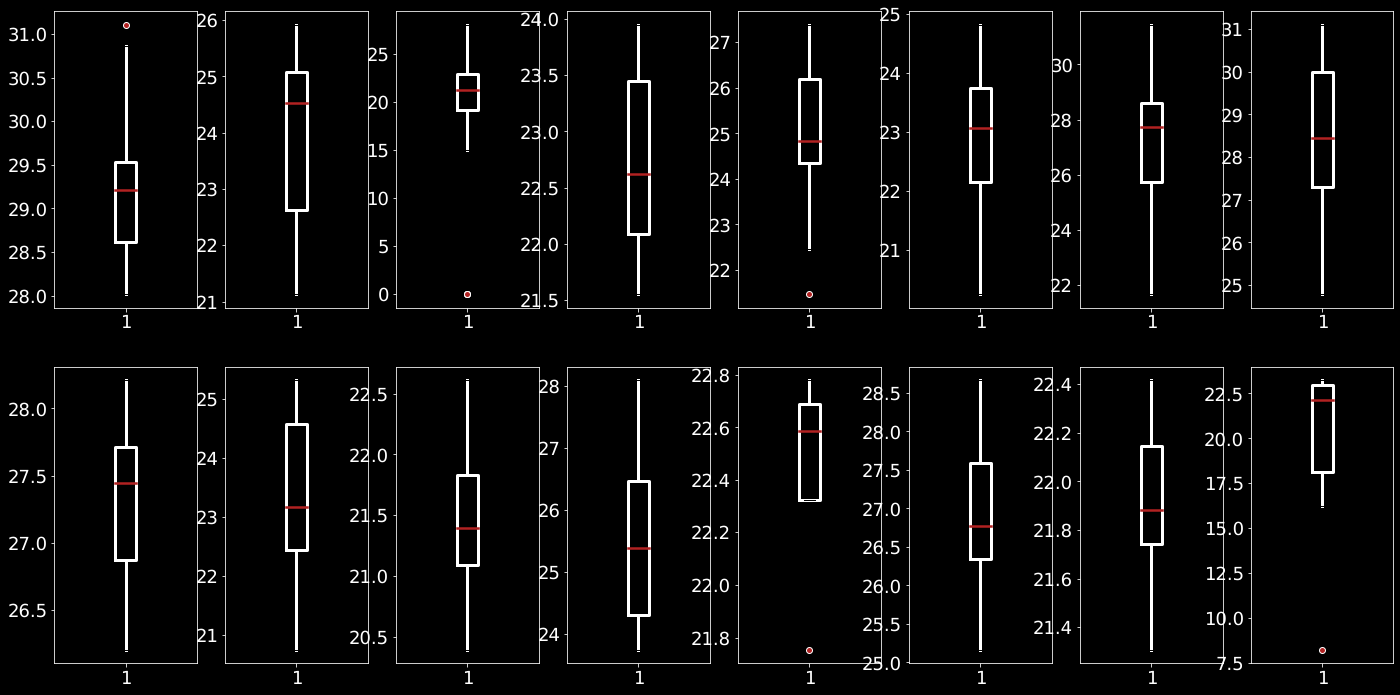

In [71]:
#%% Q-0.3.2 - Plot the various features 

# Just a little helper to make your figures pretty
from helper_plot import hdr_plot_style
hdr_plot_style()
# Use these styles for boxplot
boxprops=dict(linewidth=3, color='white')
whiskerprops=dict(linewidth=3, color='white')
medianprops=dict(linewidth=2.5, color='firebrick')
flierprops = dict(markeredgecolor='white', markerfacecolor='firebrick')

######################
fig1=plt.figure(figsize=(24,12))
#labels = ["spectral_centroid_mean","spectral_bandwidth_mean","spectral_rolloff_mean","loudness_mean"]
labels= ["spectral_contrast_mean"]

for i in range(16):    
    ax=fig1.add_subplot(2,8,i+1)
    to_plot=np.zeros([len(labels),np.sum(data_struct["classes"]==i)])
    for j in range(len(labels)):
        to_plot[j,:]=np.array(data_struct[labels[j]])[data_struct["classes"]==i]
    ax.boxplot(to_plot.T,medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,flierprops=flierprops)
######################


In [23]:
data_struct.keys()

dict_keys(['filenames', 'classes', 'class_names', 'signal', 'srate', 'spectrum_power', 'spectrum_mel', 'spectrum_chroma', 'spectrum_CQT', 'features_spectral', 'loudness', 'loudness_mean', 'loudness_std', 'spectral_centroid', 'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_bandwidth', 'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'spectral_contrast', 'spectral_contrast_mean', 'spectral_contrast_std', 'spectral_flatness', 'spectral_flatness_mean', 'spectral_flatness_std', 'spectral_rolloff', 'spectral_rolloff_mean', 'spectral_rolloff_std'])

In [56]:
#%% Q-0.3.4 - Observe the distribution of classes for different features
from helper_plot import hdr_plot_style
# This allows to use 3D rendering in matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Create a vector of random colors for each class
colorVect = np.zeros((3, len(data_struct["class_names"])));
for c in range(len(data_struct["class_names"])):
    colorVect[:,c] = np.random.rand(3);

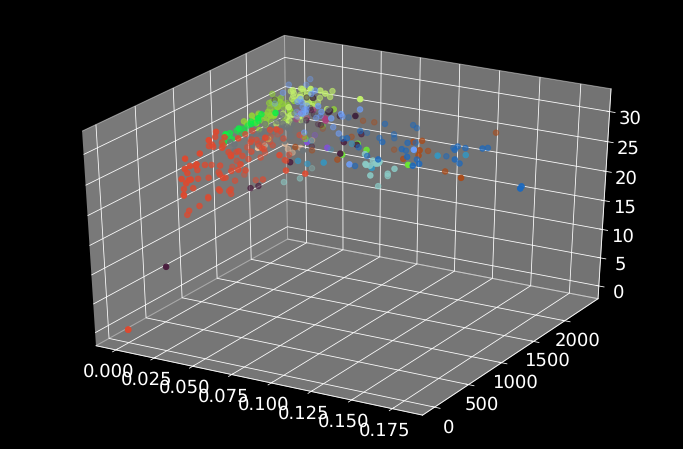

In [68]:

######################
fig=plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection = '3d')
for i in range(len(data_struct["class_names"])):
    x=np.array(data_struct["spectral_contrast_mean"])[data_struct["classes"]==i]
    y=np.array(data_struct["loudness_mean"])[data_struct["classes"]==i]
    z=np.array(data_struct["spectral_bandwidth_mean"])[data_struct["classes"]==i]
    ax.scatter(y,z,x,s=30,c=colorVect[:,i].reshape(1,-1))
######################

In [66]:
data_struct.keys()

dict_keys(['filenames', 'classes', 'class_names', 'signal', 'srate', 'spectrum_power', 'spectrum_mel', 'spectrum_chroma', 'spectrum_CQT', 'features_spectral', 'loudness', 'loudness_mean', 'loudness_std', 'spectral_centroid', 'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_bandwidth', 'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'spectral_contrast', 'spectral_contrast_mean', 'spectral_contrast_std', 'spectral_flatness', 'spectral_flatness_mean', 'spectral_flatness_std', 'spectral_rolloff', 'spectral_rolloff_mean', 'spectral_rolloff_std'])

That's it for this tutorial, now remember that we can use any form of description (features) as a basis for learning algorithms. We will see in the next tutorial what we an do with these features.